In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'potato-plant-diseases-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5082145%2F8538683%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240714%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240714T194935Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9169dbdf2687f11b649b54eddb46ef311cffc798001b343804e2465112da1db02f4765af2557a90500466eb77ca10a2784156744e94fba51b2ed5bdc2c7106365fb84b567d493824dc32f3f0e137053fe9ccb7856c0a78023822f4532d01bfef95d2e2e09c10556d43990d845292ef6fd985029c556e7c490abfc0120d9e4cc44747708a0d55b5583c88772cffe242ea821df9a9a625954a9dbbee655b1d8623f81dc29943db27eafaf7fb9a8bea9a3df8d16c481aa14a3c20250e7b430ea84eb0f2c6f61221160e3b8ea4bc86edfc6bf04c886db83543e8bee7c53e0bc20884390cf413c159b8a83583d5c518344b3f55b0fe8d6187dd821d5029dab74f3fb7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 79423158 bytes downloaded
Downloaded and uncompressed: potato-plant-diseases-data
Data source import complete.


In [ ]:
import os
import pandas as pd

path = '/kaggle/input/potato-plant-diseases-data/PlantVillage/PlantVillage'

image_data = []

# Iterate through each label directory
for label_folder in os.listdir(path):
    label_directory_path = os.path.join(path, label_folder)

    # Check if it's a directory
    if os.path.isdir(label_directory_path):
        # Create a list of tuples containing (image_path, label) for each image file
        label_images = [(os.path.join(label_directory_path, filename), label_folder)
                        for filename in os.listdir(label_directory_path)
                        if os.path.isfile(os.path.join(label_directory_path, filename))
                        and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

        # Extend the image_data list with the list of tuples
        image_data.extend(label_images)

# Create a DataFrame from the list of tuples
df_train = pd.DataFrame(image_data, columns=['Path of image', 'Label'])


In [ ]:
df_train

,Path of image,Label
0,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Late_blight
1,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Late_blight
2,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Late_blight
3,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Late_blight
4,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Late_blight
...,...,...
2147,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Early_blight
2148,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Early_blight
2149,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Early_blight
2150,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Early_blight


In [ ]:
import pandas as pd
from sklearn.utils import shuffle
train = shuffle(df_train)
train

,Path of image,Label
1584,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Early_blight
633,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Late_blight
1250,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Early_blight
1617,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Early_blight
886,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Late_blight
...,...,...
604,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Late_blight
1515,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Early_blight
1088,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___healthy
1380,/kaggle/input/potato-plant-diseases-data/Plant...,Potato___Early_blight


In [ ]:
path = '/kaggle/input/potato-plant-diseases-data/PotatoPlants'

image_data = []

for label_folder in os.listdir(path):
    label_directory_path = os.path.join(path, label_folder)

    if os.path.isdir(label_directory_path):
        label_images = [(os.path.join(label_directory_path, filename), label_folder)
                        for filename in os.listdir(label_directory_path)
                        if os.path.isfile(os.path.join(label_directory_path, filename))
                        and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

        image_data.extend(label_images)

df_test = pd.DataFrame(image_data, columns=['Path of image', 'Label'])

In [ ]:
df_test

,Path of image,Label
0,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Late_blight
1,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Late_blight
2,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Late_blight
3,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Late_blight
4,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Late_blight
...,...,...
2147,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Early_blight
2148,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Early_blight
2149,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Early_blight
2150,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Early_blight


In [ ]:
test = shuffle(df_test)
test

,Path of image,Label
372,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Late_blight
2113,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Early_blight
780,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Late_blight
847,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Late_blight
1432,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Early_blight
...,...,...
1563,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Early_blight
1422,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Early_blight
588,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Late_blight
1754,/kaggle/input/potato-plant-diseases-data/Potat...,Potato___Early_blight


In [ ]:
import os
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Normalize, Resize
from torchvision import transforms
from sklearn.model_selection import train_test_split


transform = transforms.Compose([
    Resize((265, 265)),  # Resize the image to 265x265
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_df, val_df = train_test_split(train, test_size=0.2, random_state=42, stratify=train['Label'])

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data.iloc[idx]['Path of image']
        image = Image.open(image_path).convert('RGB')  # Open image and convert to RGB if not already
        label = self.data.iloc[idx]['Label']

        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [ ]:
train_dataset = CustomDataset(train_df, transform=transform)
val_dataset = CustomDataset(val_df, transform=transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
test_dataset = CustomDataset(test, transform=transform)
batch_size = 32
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 66 * 66, 128)
        self.fc2 = nn.Linear(128, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 66 * 66)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch.optim as optim

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.002)

In [ ]:
!pip install Pillow


In [ ]:
from PIL import Image


Epoch [1/5], Step [10/54], Loss: 0.2209
Epoch [1/5], Step [20/54], Loss: 0.2210
Epoch [1/5], Step [30/54], Loss: 0.1210
Epoch [1/5], Step [40/54], Loss: 0.0891
Epoch [1/5], Step [50/54], Loss: 0.1514
Epoch [2/5], Step [10/54], Loss: 0.0808
Epoch [2/5], Step [20/54], Loss: 0.0711
Epoch [2/5], Step [30/54], Loss: 0.0553
Epoch [2/5], Step [40/54], Loss: 0.0843
Epoch [2/5], Step [50/54], Loss: 0.0707
Epoch [3/5], Step [10/54], Loss: 0.0581
Epoch [3/5], Step [20/54], Loss: 0.0433
Epoch [3/5], Step [30/54], Loss: 0.0480
Epoch [3/5], Step [40/54], Loss: 0.0400
Epoch [3/5], Step [50/54], Loss: 0.0189
Epoch [4/5], Step [10/54], Loss: 0.0145
Epoch [4/5], Step [20/54], Loss: 0.0129
Epoch [4/5], Step [30/54], Loss: 0.0235
Epoch [4/5], Step [40/54], Loss: 0.0322
Epoch [4/5], Step [50/54], Loss: 0.0617
Epoch [5/5], Step [10/54], Loss: 0.1890
Epoch [5/5], Step [20/54], Loss: 0.1714
Epoch [5/5], Step [30/54], Loss: 0.0994
Epoch [5/5], Step [40/54], Loss: 0.0869
Epoch [5/5], Step [50/54], Loss: 0.0732


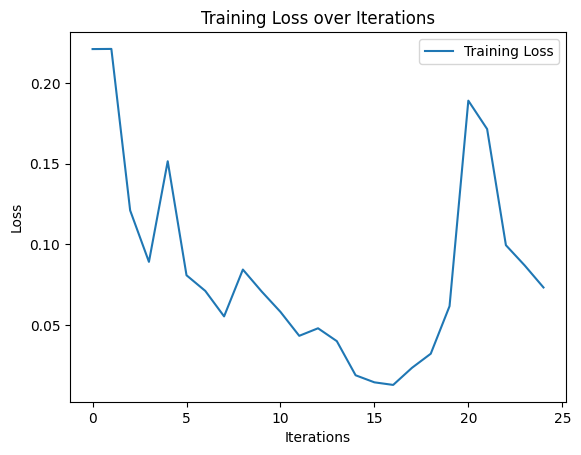

In [ ]:
# Training loop
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):

        label_mapping = {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}
        numerical_labels = torch.tensor([label_mapping[label] for label in labels])

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass + backward pass + optimize
        outputs = model(inputs)
        loss = criterion(outputs, numerical_labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        if (i+1) % 10 == 0:    # Print every 10 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}')
            train_losses.append(running_loss / 10)
            running_loss = 0.0

# Plotting the training loss
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.show()

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Predicted: 1, True: 1


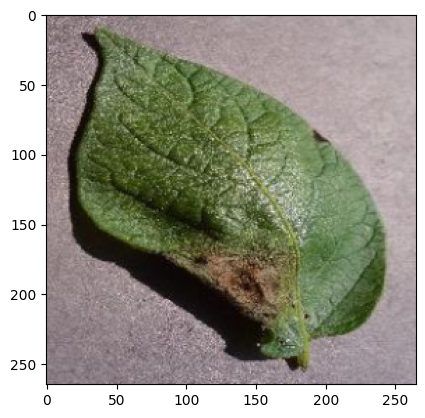

Predicted: 0, True: 0


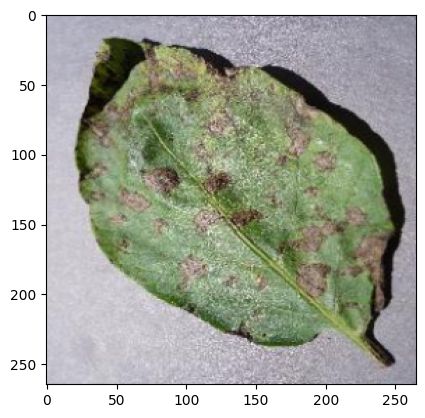

Predicted: 1, True: 1


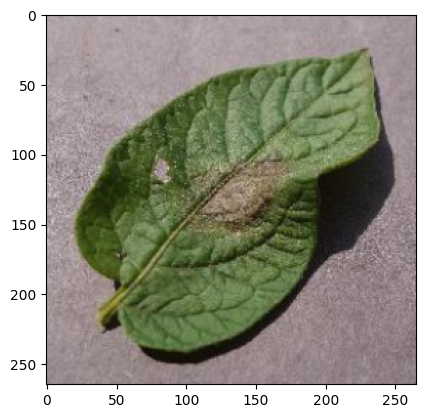

Predicted: 1, True: 1


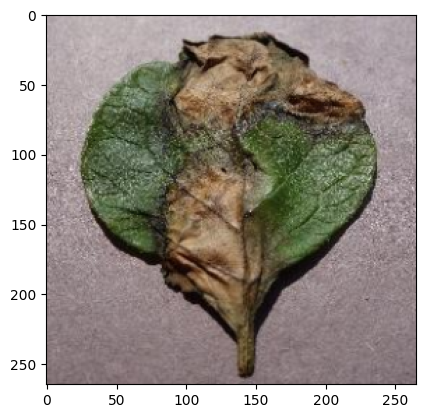

Predicted: 0, True: 0


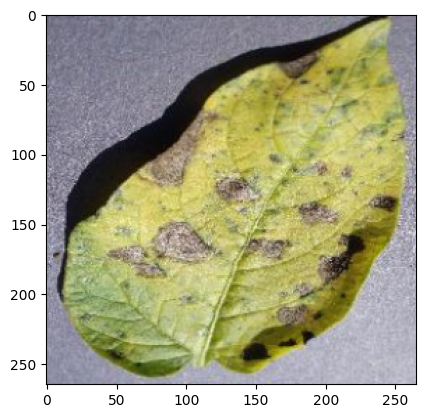

In [ ]:
model.eval()
sample_count = 0
max_samples = 5

# Iterate over the test dataset and make predictions
with torch.no_grad():
    for images, labels in test_loader:  # assuming test_loader returns (images, labels)
        images = images.to(device)
        # Convert labels to numerical labels and then to a tensor
        numerical_labels = torch.tensor([label_mapping[label] for label in labels]).to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Print the predicted labels and show the images
        for i in range(len(images)):
            print(f'Predicted: {predicted[i].item()}, True: {numerical_labels[i].item()}')
            imshow(images[i].cpu())  # Move the image to CPU and display it
            sample_count += 1
            if sample_count >= max_samples:
                break
        if sample_count >= max_samples:
            break


# another version

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1_input_size = 256 * (265 // 16) * (265 // 16)  # 265 // (2^4) because of four pooling layers

        # Define fully connected layers
        self.fc1 = nn.Linear(self.fc1_input_size, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 3)  # Assuming 3 classes for the output

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv layer 1 + ReLU + Pooling
        x = self.pool(F.relu(self.conv2(x)))  # Conv layer 2 + ReLU + Pooling
        x = self.pool(F.relu(self.conv3(x)))  # Conv layer 3 + ReLU + Pooling
        x = self.pool(F.relu(self.conv4(x)))  # Conv layer 4 + ReLU + Pooling
        x = x.view(-1, self.fc1_input_size)  # Flatten the tensor
        x = F.relu(self.fc1(x))  # Fully connected layer 1 + ReLU
        x = F.relu(self.fc2(x))  # Fully connected layer 2 + ReLU
        x = self.fc3(x)  # Fully connected layer 3 (Output layer)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.002)

Epoch [1/5], Step [10/54], Loss: 1.4219
Epoch [1/5], Step [20/54], Loss: 0.7102
Epoch [1/5], Step [30/54], Loss: 0.5292
Epoch [1/5], Step [40/54], Loss: 0.4695
Epoch [1/5], Step [50/54], Loss: 0.5077
Epoch [2/5], Step [10/54], Loss: 0.4919
Epoch [2/5], Step [20/54], Loss: 0.4740
Epoch [2/5], Step [30/54], Loss: 0.3520
Epoch [2/5], Step [40/54], Loss: 0.3915
Epoch [2/5], Step [50/54], Loss: 0.4495
Epoch [3/5], Step [10/54], Loss: 0.3433
Epoch [3/5], Step [20/54], Loss: 0.3576
Epoch [3/5], Step [30/54], Loss: 0.3392
Epoch [3/5], Step [40/54], Loss: 0.2609
Epoch [3/5], Step [50/54], Loss: 0.2586
Epoch [4/5], Step [10/54], Loss: 0.2691
Epoch [4/5], Step [20/54], Loss: 0.2639
Epoch [4/5], Step [30/54], Loss: 0.3196
Epoch [4/5], Step [40/54], Loss: 0.1804
Epoch [4/5], Step [50/54], Loss: 0.2722
Epoch [5/5], Step [10/54], Loss: 0.1569
Epoch [5/5], Step [20/54], Loss: 0.1596
Epoch [5/5], Step [30/54], Loss: 0.1397
Epoch [5/5], Step [40/54], Loss: 0.1181
Epoch [5/5], Step [50/54], Loss: 0.1106


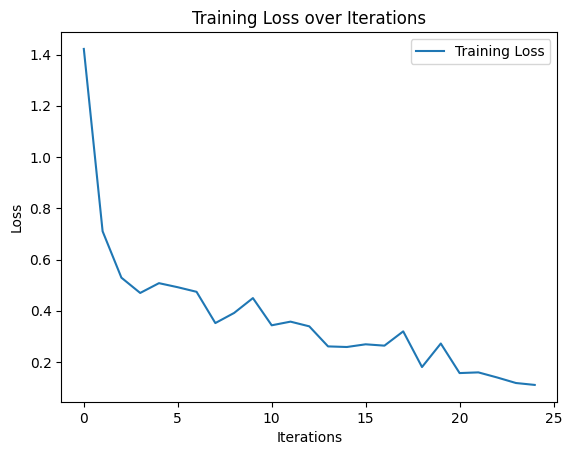

In [ ]:
# Training loop
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):

        label_mapping = {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}
        numerical_labels = torch.tensor([label_mapping[label] for label in labels])

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass + backward pass + optimize
        outputs = model(inputs)
        loss = criterion(outputs, numerical_labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        if (i+1) % 10 == 0:    # Print every 10 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}')
            train_losses.append(running_loss / 10)
            running_loss = 0.0

# Plotting the training loss
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.show()

Predicted: 1, True: 1


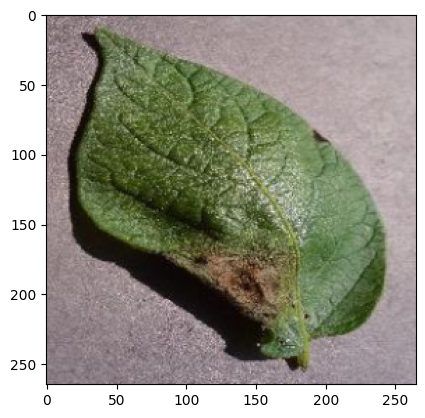

Predicted: 0, True: 0


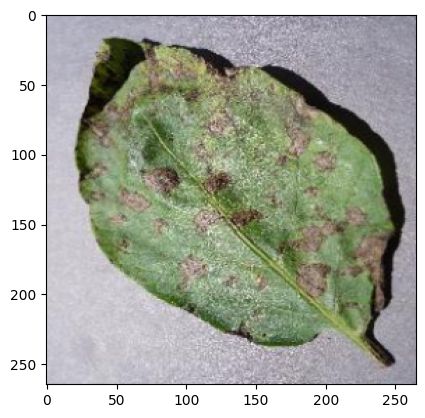

Predicted: 1, True: 1


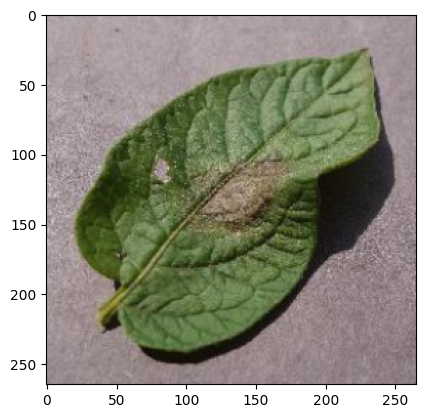

Predicted: 1, True: 1


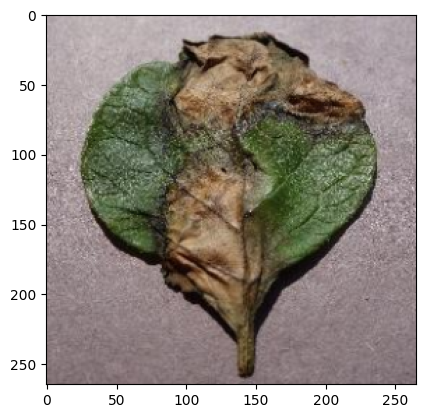

Predicted: 0, True: 0


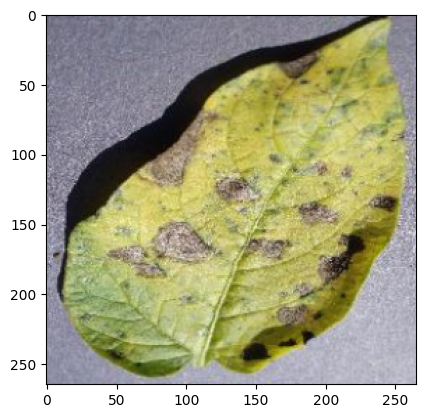

In [ ]:
model.eval()
sample_count = 0
max_samples = 5

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)

        numerical_labels = torch.tensor([label_mapping[label] for label in labels]).to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(images)):
            print(f'Predicted: {predicted[i].item()}, True: {numerical_labels[i].item()}')
            imshow(images[i].cpu())
            sample_count += 1
            if sample_count >= max_samples:
                break
        if sample_count >= max_samples:
            break